In [7]:
import os  # Importa o módulo os para interação com o sistema operacional
import random  # Importa o módulo random para operações relacionadas a números aleatórios
import numpy as np  # Importa o NumPy para operações com arrays e funções matemáticas
import keras  # Importa a biblioteca Keras para criação e treinamento de redes neurais
import matplotlib.pyplot as plt  # Importa o matplotlib.pyplot para criação de gráficos
import tensorflow as tf
from matplotlib.pyplot import imshow  # Importa a função imshow para exibir imagens
from keras.preprocessing import image  # Importa o módulo de pré-processamento de imagens do Keras
from keras.applications.imagenet_utils import preprocess_input  # Importa a função de pré-processamento específica para modelos ImageNet
from keras.models import Sequential  # Importa o modelo Sequential do Keras, que é uma pilha linear de camadas
from keras.layers import Dense, Dropout, Flatten, Activation  # Importa camadas de rede neural densa, dropout, achatamento e ativação
from keras.layers import Conv2D, MaxPooling2D  # Importa camadas de convolução e max pooling para redes neurais convolucionais
from keras.models import Model

In [8]:
print("Diretório atual:", os.getcwd())
print("Conteúdo do diretório atual:", os.listdir('.'))

Diretório atual: /content
Conteúdo do diretório atual: ['.config', 'drive', 'sample_data']


In [ ]:
! apt-get install unrar

In [ ]:
!pip install rarfile

In [ ]:
import rarfile

# Caminho para o arquivo .rar
rar_path = '/content/drive/MyDrive/Colab Notebooks/DIO - Machine Learning/PetImages.rar'

# Caminho para o diretório de extração
destination_path = '/content/drive/MyDrive/Colab Notebooks/DIO - Machine Learning/'

# Abrir e extrair o conteúdo
with rarfile.RarFile(rar_path) as rf:
    rf.extractall(destination_path)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

root = '/content/drive/MyDrive/Colab Notebooks/DIO - Machine Learning/PetImages'

In [9]:
root = '/content/drive/MyDrive/Colab Notebooks/DIO - Machine Learning/PetImages'
exclude = ['.ipynb_checkpoints']
# Verifica se o diretório existe
if os.path.exists(root):
    categories = [dir_name for dir_name in os.listdir(root) if os.path.isdir(os.path.join(root, dir_name))]
    print(categories)
else:
    print(f"O diretório {root} não foi encontrado.")

['Dog', 'Cat']


In [10]:
# função auxiliar para carregar a imagem e retorná-la e o vetor de entrada
def get_image(path):
    img = image.load_img(path, target_size = (224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [11]:
data = []

for c, category in enumerate(categories):
    category_path = os.path.join(root, category)  # Caminho completo para a categoria
    imagens = [os.path.join(category_path, f) for dp, dn, filenames in os.walk(category_path) for f in filenames
               if os.path.splitext(f)[1].lower() in ['.jpg', '.png', '.jpeg']]
    for cont, img_path in enumerate(imagens):
        try:
            img, x = get_image(img_path)
            frase_imagem = f"{cont}º imagem"
            #print(frase_imagem)
            try:
                data.append({'x':np.array(x[0]), 'y':c})
            except Exception as e:
                e = erro
                #print(f"Erro: {erro}")

        except Exception as erro:
            erro = erro
            #print(f"Erro: {erro}")

# Contando o número de classes
num_classes = len(categories)
print(f'Número de classes        : {num_classes}')
print(f'Número de imagens na base: {len(data)}')

Número de classes: 2
Número de imagens na base:1999


In [12]:
# embaralhar (reorganizar aleatoriamente) os elementos da lista data
# Boa prática, principalmente quando desejar dividir em treino, validação e teste
random.shuffle(data)

In [13]:
# conjunto de treinamento, conjunto de validação, conjunto de teste
train_split, val_split, test_split = 0.7, 0.15, 0.15

In [15]:
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))

train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]
print(f"Tamanho dos dados de treino   : {len(train)}")
print(f"Tamanho dos dados de validação: {len(val)}")
print(f"Tamanho dos dados de teste    : {len(test)}")

Tamanho dos dados de treino   : 1399
Tamanho dos dados de validação: 300
Tamanho dos dados de teste    : 300


In [16]:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1]


**Explicação:**


<ul>   <li>Normalização dos dados de entrada</li>
<ul> <li>cada conjunto de dados (x_train, x_val, x_test) é normalizado ao converter os valores de pixel (geralmente entre 0 e 255, como em imagens RGB ou escala de cinza) para o intervalo [0, 1].</li>
<li>Normalizar os dados ajuda os modelos de machine learning ou deep learning a convergirem mais rapidamente e a obterem melhores resultados. Isso ocorre porque dados normalizados têm magnitudes menores, o que reduz problemas de instabilidade numérica durante o treinamento.</li>
<li> astype('float32'): Converte os dados para o tipo de ponto flutuante de 32 bits, necessário para cálculos eficientes no TensorFlow ou Keras (que preferem esse tipo para treinamento em GPU).</li>
</ul>
    <li> Conversão dos rótulos em vetores one-hot</li>
<ul>
    <li>Os rótulos de saída (y_train, y_val, y_test), que geralmente estão na forma de inteiros (ex.: 0, 1, 2 para uma classificação de 3 classes), são transformados em vetores one-hot.

Por exemplo:
<ul><li>Um rótulo 2 em um problema com num_classes = 3 se torna o vetor [0, 0, 1].
<li>O rótulo 0 se torna [1, 0, 0].
    </ul>
    <li>Essa conversão é necessária para problemas de classificação, onde a saída do modelo precisa ser comparada com a probabilidade para cada classe. Modelos como redes neurais utilizam softmax na camada de saída, que fornece probabilidades para cada classe. Vetores one-hot permitem calcular de forma eficiente a perda (usando, por exemplo, a cross-entropy loss).
</ul>
</ul>


In [17]:
# normalize dos dados de entrada

x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# converte dos rótulos em vetores one-hot
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
# A forma do array resultante de y_test após a conversão para one-hot. Será algo como (n_samples, num_classes), onde:
# n_samples: número de amostras no conjunto de teste.
# num_classes: número de classes do problema de classificação.
print(y_test.shape)

(300, 2)


In [18]:
# Resumo
print("Carregamento finalizado de %d imagens de %d categorias"%(len(data), num_classes))
print("Divisão: treino / validação / test: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("Forma dos dados de treinamento: ", x_train.shape)
print("Forma das etiquetas de treinamento: ", y_train.shape)

Carregamento finalizado de 1999 imagens de 2 categorias
Divisão: treino / validação / test: 1399, 300, 300
Forma dos dados de treinamento:  (1399, 224, 224, 3)
Forma das etiquetas de treinamento:  (1399, 2)


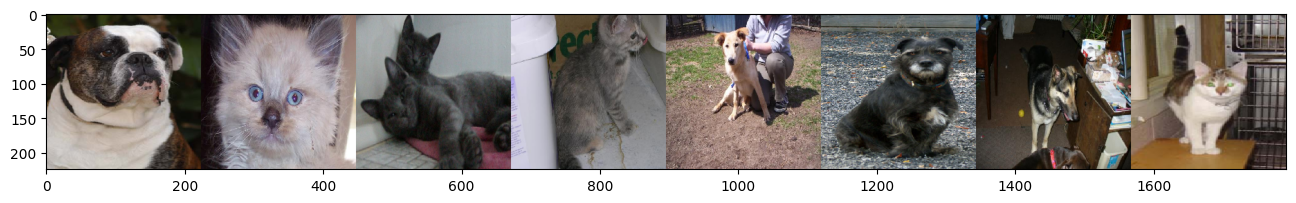

In [19]:
# busca imagens em no diretório
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
# seleciona aleatoriamente 8 imagens
idx = [int(len(images) * random.random()) for i in range(8)]
# carrega e redimensiona as imagens
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]
# concatena as imagens horizontalmente
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
# exibe a imagem concatenada
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

In [20]:
# construção da rede neural convulacional (CNN) usando Keras

# modelo sequential
model = Sequential()
print("Dimensões de entradas: ",x_train.shape[1:])

# primeira camada convolucional 2D com 32 filtros, cada um de tamanho 3 x 3
model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# segunda camada convolucional adicionando mais uma camada com 32 filtos de tamanho 3 x 3
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# dropout: mecanismo para prevenir overfitting durante o treinamento, " dsesligando" 25% das unidades de rede aleatoriamente durante cada atualização de peso
model.add(Dropout(0.25))

# terceira e quarta camada convolucionais: mais duas camadas com 32 filtos de tamanho 3 x 3
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

# camada que achata as saídas das camadas convolucionais em um vetor unidimensional para serem alimentadas na rede totalmente conectada.
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

# camada totalmente conectada com o número de saídas igual ao número de classes de classificação em probabilidades, onde a soma das saídas será igual a 1.
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# resumo da arquitetura do modelo, mostrando o número de parâmetros de cada camada, o tipo de camada e a forma de saída de cada camada.
model.summary()

Dimensões de entradas:  (224, 224, 3)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,209,058 (4.61 MB)

 Trainable params: 1,209,058 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# compila o modelo para usar a função de perda de entropia cruzada categórica e o otimizador adadelta
# função de perda categorical_crossentropy
model.compile(loss = 'categorical_crossentropy',
              # otimizador ADAM
              optimizer = 'adam',
              # métrica de acurácia
              metrics = ['accuracy'])

# dados e rótulos de treinamento
history = model.fit(x_train, y_train,
                    # tamanho do lote para cada iteração de treinamento
                    batch_size = 128,
                    # números de épocas para treinar o modelo
                    epochs = 10,
                    # dados de validação para avaliar o modelo em cada época
                    validation_data = (x_val, y_val))

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 116s 10s/step - accuracy: 0.4836 - loss: 0.7055 - val_accuracy: 0.5567 - val_loss: 0.6871
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 110s 10s/step - accuracy: 0.5813 - loss: 0.6759 - val_accuracy: 0.6167 - val_loss: 0.6656
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 142s 10s/step - accuracy: 0.6439 - loss: 0.6475 - val_accuracy: 0.6133 - val_loss: 0.6485
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 139s 10s/step - accuracy: 0.6451 - loss: 0.6262 - val_accuracy: 0.6300 - val_loss: 0.6458
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 155s 11s/step - accuracy: 0.6451 - loss: 0.6066 - val_accuracy: 0.6433 - val_loss: 0.6311
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 130s 10s/step - accuracy: 0.6823 - loss: 0.5920 - val_accuracy: 0.6300 - val_loss: 0.6414
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 110s 10s/step - accuracy: 0.7173 - loss: 0.5498 - val_accuracy: 0.6800 - val_loss: 0.6054
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 139s 10s/step - accuracy: 0.7371 - loss: 0.5344 - val_accuracy: 0.

Esse código é uma visualização de desempenho de um modelo de machine learning durante o treinamento. Ele utiliza **Matplotlib** para criar dois gráficos lado a lado que mostram como os valores de loss (perda) e accuracy (acurácia) mudaram ao longo das épocas no conjunto de validação.

O que esses gráficos mostram:
* **Gráfico da perda de validação (val_loss)**: Indica o quanto o modelo está errando no conjunto de validação a cada época.
Normalmente, espera-se que a perda diminua conforme o modelo melhora.
* **Gráfico da acurácia de validação (val_accuracy)**:
Mede a proporção de previsões corretas no conjunto de validação.
Um aumento constante é desejado, indicando que o modelo está aprendendo.

Esses gráficos ajudam a avaliar se o modelo está convergindo, sofrendo ***overfitting*** (quando a perda de validação aumenta enquanto a perda de treinamento diminui) ou ***underfitting*** (quando o modelo não aprende bem nem nos dados de treino nem de validação).

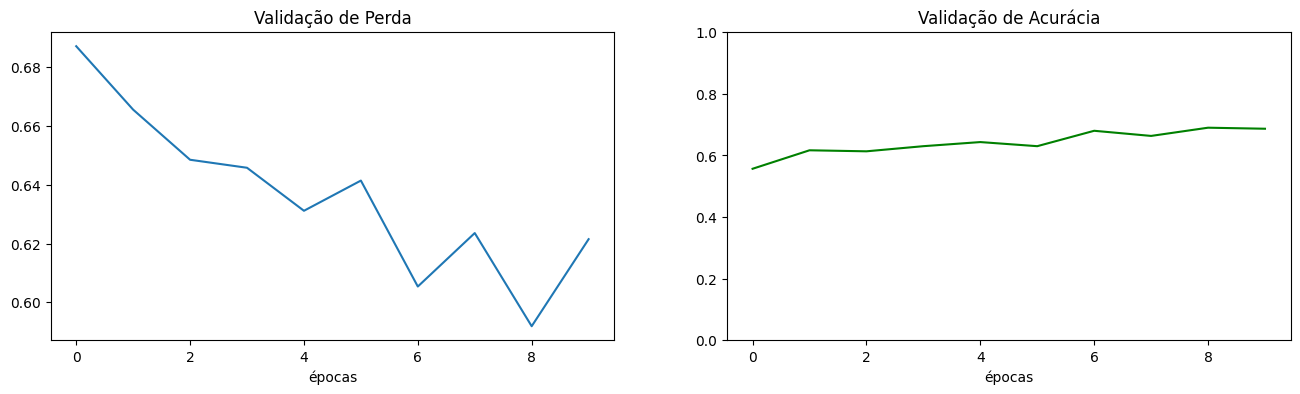

In [23]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("Validação de Perda")
ax.set_xlabel("épocas")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"], color = 'green')
ax2.set_title("Validação de Acurácia")
ax2.set_xlabel("épocas")
ax2.set_ylim(0, 1)

plt.show()

In [24]:
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
print(f'Teste de perda   : {loss * 100:.2f}%')
print(f'Teste de acurácia: {accuracy * 100:.2f}%')

Teste de perda   : 57.52%
Teste de acurácia: 72.33%


**TensorFlow carrega o modelo pré-treinado VGG16, uma rede neural convolucional bastante conhecida no campo de visão computacional**

* ***Transfer Learning***: Se você quiser usar o modelo como ponto de partida para resolver um problema de classificação personalizado, ele já vem "treinado".
* ***Eficiência***: Reduz o custo computacional e o tempo necessário para treinar o modelo do zero.
* ***Precisão***: É um modelo robusto, amplamente testado e bem-sucedido em tarefas de visão computacional.


In [25]:
vgg = tf.keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

Implementação da técnica comum de ***Transfer Learning***, que reutiliza um modelo pré-treinado (neste caso, o **VGG**, uma rede convolucional popular para visão computacional) e adapta-o para resolver um problema diferente do original.

O código reutiliza o modelo **VGG** até sua penúltima camada e substitui a última camada (original) por uma nova camada de classificação que se ajusta ao número de classes do novo problema (num_classes).

Este processo é chamado de ***re-treinar a cabeça*** da rede (retraining the head) e permite aproveitar os recursos já aprendidos pelo VGG em tarefas semelhantes (por exemplo, aprendizado de características de imagens).

In [26]:
# referência à camada de entrada do VGG
inp = vgg.input

# nova camada softnax com neurônios num_classes
new_classification_layer = Dense(num_classes, activation='softmax')

# conecte a nova camada da segunda a última camada no VGG e faça uma referência a ela
out = new_classification_layer(vgg.layers[-2].output)

# cria uma nova rede entre inp e out
model_new = Model(inp, out)

In [27]:
# tornar todas as camadas não treináveis ​​congelando pesos (exceto a última camada)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# garantir que a última camada seja treinável/não congelada
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 8,194 (32.01 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

In [28]:
history2 = model_new.fit(x_train, y_train,
                         batch_size = 128,
                         epochs = 10,
                         validation_data = (x_val, y_val))

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1125s 104s/step - accuracy: 0.4981 - loss: 0.9330 - val_accuracy: 0.7367 - val_loss: 0.5562
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1141s 102s/step - accuracy: 0.6847 - loss: 0.5749 - val_accuracy: 0.6400 - val_loss: 0.5460
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1158s 102s/step - accuracy: 0.7461 - loss: 0.4756 - val_accuracy: 0.8467 - val_loss: 0.4049
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1106s 102s/step - accuracy: 0.8419 - loss: 0.3960 - val_accuracy: 0.8533 - val_loss: 0.3575
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1155s 101s/step - accuracy: 0.8657 - loss: 0.3651 - val_accuracy: 0.8567 - val_loss: 0.3402
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1117s 102s/step - accuracy: 0.8456 - loss: 0.3609 - val_accuracy: 0.8767 - val_loss: 0.3285
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1160s 103s/step - accuracy: 0.8912 - loss: 0.3184 - val_accuracy: 0.8933 - val_loss: 0.3090
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1160s 102s/step - accuracy: 0.8962 - loss: 0.3007 - 

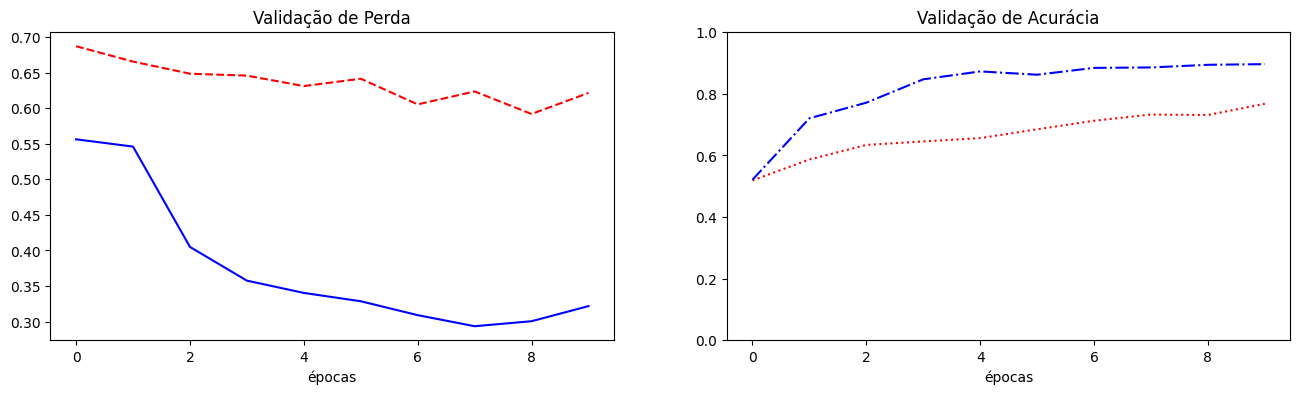

In [30]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"], color = 'red', linestyle = '--')
ax.plot(history2.history["val_loss"], color = 'blue', linestyle = '-')
ax.set_title("Validação de Perda")
ax.set_xlabel("épocas")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["accuracy"], color = 'red', linestyle = ':')
ax2.plot(history2.history["accuracy"], color = 'blue', linestyle = '-.')
ax2.set_title("Validação de Acurácia")
ax2.set_xlabel("épocas")
ax2.set_ylim(0, 1)

plt.show()

In [31]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose  = 0)
print(f'Teste de perda   : {loss * 100:.2f}%')
print(f'Teste de acurácia: {accuracy * 100:.2f}%')

Teste de perda   : 28.60%
Teste de acurácia: 89.67%


In [ ]:
# Salvando o modelo
model.save("cats_vs_dogs_transfer_learning.h5")